In [11]:
!pip install -q condacolab
import condacolab
condacolab.install()

✨🍰✨ Everything looks OK!


In [12]:
!conda install -c conda-forge nest-simulator
!conda install -c conda-forge matplotlib

Channels:
 - conda-forge
Platform: linux-64
Solving environment: / - \ | / - \ | / done


==> WARNING: A newer version of conda exists. <==
    current version: 23.11.0
    latest version: 24.11.2

Please update conda by running

    $ conda update -n base -c conda-forge conda



# All requested packages already installed.

Channels:
 - conda-forge
Platform: linux-64
Solving environment: / - \ | / - \ | done


==> WARNING: A newer version of conda exists. <==
    current version: 23.11.0
    latest version: 24.11.2

Please update conda by running

    $ conda update -n base -c conda-forge conda



# All requested packages already installed.



In [13]:
!pip install networkx matplotlib

In [14]:
import networkx as nx
import matplotlib.pyplot as plt

In [15]:
!pip install pyNN

In [27]:
import numpy as np

In [31]:
import nest

# Parameters for excitatory neurons
exc_params = {
    'model': 'iaf_psc_alpha',
    # 'num_neurons': 40,  # Remove this line
    'positions': nest.spatial.free(pos=nest.random.uniform(min=-0.5, max=0.5), num_dimensions=2)
}

# Create excitatory neurons, specifying the number (n=40) separately
exc_neurons = nest.Create(exc_params['model'], n=40, positions=exc_params['positions'])


# Parameters for inhibitory neurons
inh_params = {
    'model': 'iaf_psc_alpha',
    # 'num_neurons': 10,  # Remove this line
    'positions': nest.spatial.free(pos=nest.random.uniform(min=-0.5, max=0.5), num_dimensions=2)
}

# Create inhibitory neurons, specifying the number (n=10) separately
inh_neurons = nest.Create(inh_params['model'], n=10, positions=inh_params['positions'])

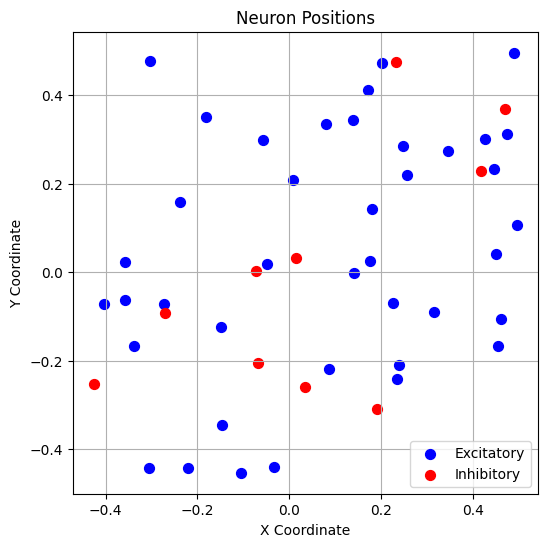

In [33]:
exc_positions = nest.GetPosition(exc_neurons)
exc_x_coords = [pos[0] for pos in exc_positions]
exc_y_coords = [pos[1] for pos in exc_positions]

# Get node positions for inhibitory neurons
inh_positions = nest.GetPosition(inh_neurons)
inh_x_coords = [pos[0] for pos in inh_positions]
inh_y_coords = [pos[1] for pos in inh_positions]

# Plot the neuron positions with different colors
plt.figure(figsize=(6, 6))
plt.scatter(exc_x_coords, exc_y_coords, s=50, c='blue', label='Excitatory')  # Blue for excitatory
plt.scatter(inh_x_coords, inh_y_coords, s=50, c='red', label='Inhibitory')  # Red for inhibitory
plt.title("Neuron Positions")
plt.xlabel("X Coordinate")
plt.ylabel("Y Coordinate")
plt.grid(True)
plt.legend()  # Add a legend to distinguish neuron types
plt.show()


In [44]:
conndict = {
    "rule": "pairwise_bernoulli",
    "p": nest.spatial_distributions.gaussian(nest.spatial.distance, std=1.0),
    "mask": {"circular": {"radius": 4.0}},
}


In [48]:
# Assuming 'layer' from previous cell contains the desired nodes
nest.Connect(layer, layer, conndict)

In [49]:

import nest

# Check if NEST is initialized
try:
    nest.GetKernelStatus()
    print("NEST is initialized and working correctly.")
except Exception as e:
    print(f"Error: NEST initialization failed. {e}")

# Check the number of nodes created
try:
    num_exc_neurons = len(exc_neurons)
    num_inh_neurons = len(inh_neurons)
    print(f"Number of excitatory neurons: {num_exc_neurons}")
    print(f"Number of inhibitory neurons: {num_inh_neurons}")
except NameError:
    print("Error: exc_neurons or inh_neurons not defined. Please run the neuron creation code first.")


# Verify connections
try:
    connections = nest.GetConnections(layer, layer) # Assuming 'layer' is defined and contains nodes
    num_connections = len(connections)
    print(f"Number of connections between nodes in 'layer': {num_connections}")

    if num_connections == 0:
        print("Warning: No connections found between nodes in 'layer'. Check your connection parameters.")
except NameError:
    print("Error: 'layer' is not defined. Please ensure the layer is correctly created.")
except Exception as e:
    print(f"Error checking connections: {e}")



NEST is initialized and working correctly.
Number of excitatory neurons: 40
Number of inhibitory neurons: 10
Number of connections between nodes in 'layer': 15042
